# lab3

In [40]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (10,8)

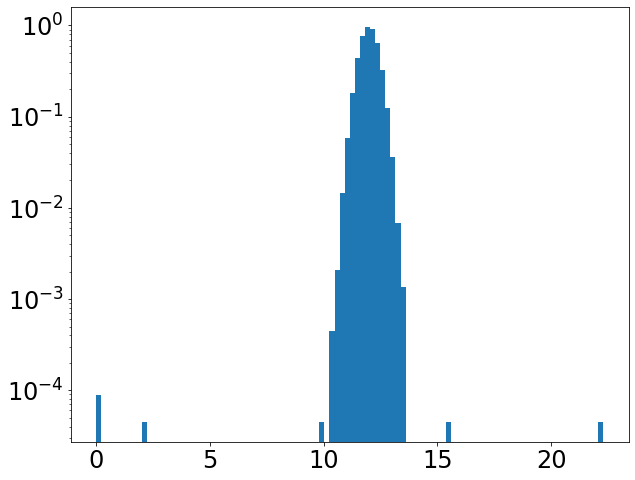

In [30]:
# where mean is 12, and sd is 0.4
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()


# part A)
A2) 
The statistical question expressed in the word is to define which data is good and which data is bad.
And find the threshold value of the $X\sigma$ to make sure that we remove maximun bad data and keep maximun good data.


A3) The question in math is within which deviation from the mean do we want to include.

A4) statistical test and truth table
and assume each variable as below, and here we choose $3\sigma$, $4\sigma$ and $5\sigma$

|  | True T | Bad T |
| --- | --- | --- |
| Your Test Good | GT | GB |
| Your Test Bad  | BT | BB |

In [31]:
#3sigma

#initialize
GT = 0
BT = 0
GB = 0
BB = 0

badData = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
threshold = 1.2 #3*0.4

for i in range(len(d)):
    if (abs(12.-d[i]) >= threshold):#test bad
        if d[i] in badData[:]:
            BB = BB+1
        else:
            BT = BT+1
    else: # test good 
        if d[i] in badData[:]:
            GB = GB+1
        else:
            GT = GT+1

print('Your Test Good + True T = ' + str(GT))
print('Your Test Good + Bad T = ' + str(GB))
print('Your Test Bad + True T = ' + str(BT))
print('Your Test Bad + Bad T = ' + str(BB))

Your Test Good + True T = 99742
Your Test Good + Bad T = 1
Your Test Bad + True T = 258
Your Test Bad + Bad T = 7


|  | True T | Bad T |
| --- | --- | --- |
| Your Test Good | 99714 | 1 |
| Your Test Bad  | 286 | 7 |

In [33]:
#4sigma

#initialize again
GT = 0
BT = 0
GB = 0
BB = 0

threshold = 1.6 #4*0.4

for i in range(len(d)):
    if (abs(12.-d[i]) >= threshold):#test bad
        if d[i] in badData[:]:
            BB = BB+1
        else:
            BT = BT+1
    else: # test good 
        if d[i] in badData[:]:
            GB = GB+1
        else:
            GT = GT+1

print('Your Test Good + True T = ' + str(GT))
print('Your Test Good + Bad T = ' + str(GB))
print('Your Test Bad + True T = ' + str(BT))
print('Your Test Bad + Bad T = ' + str(BB))

Your Test Good + True T = 99997
Your Test Good + Bad T = 1
Your Test Bad + True T = 3
Your Test Bad + Bad T = 7


|  | True T | Bad T |
| --- | --- | --- |
| Your Test Good | 99992 | 1 |
| Your Test Bad  | 8 | 7 |

In [34]:
#5sigma

#initialize again
GT = 0
BT = 0
GB = 0
BB = 0

threshold = 2 #5*0.4

for i in range(len(d)):
    if (abs(12.-d[i]) >= threshold):#test bad
        if d[i] in badData[:]:
            BB = BB+1
        else:
            BT = BT+1
    else: # test good 
        if d[i] in badData[:]:
            GB = GB+1
        else:
            GT = GT+1

print('Your Test Good + True T = ' + str(GT))
print('Your Test Good + Bad T = ' + str(GB))
print('Your Test Bad + True T = ' + str(BT))
print('Your Test Bad + Bad T = ' + str(BB))

Your Test Good + True T = 100000
Your Test Good + Bad T = 2
Your Test Bad + True T = 0
Your Test Bad + Bad T = 6


|  | True T | Bad T |
| --- | --- | --- |
| Your Test Good | 100000 | 2 |
| Your Test Bad  | 0 | 6 |

# part b)

With the chosen threshold increasing, we find that the number of omissions is decreasing. 
If the threshold value is relatively small, then we will omit more data, both good and bad, and vice versa. 
I think it is a predictable quantity, we can use the probability equation here to help us make a good prediction, especially here is mainly the Guassian distribution. 

# part c)

Yes, there are mistakes of commision, which is the variable GT. I think they are avoidable in some extent, but we should also accept that it may be avoidable at such a large cost. For example, when the bad data point is so close to the expected value, then we need very small threshold value to omit it. Hence, we actually omit this bad data, but with the cost of a large number of the good data. 

# Problem 2

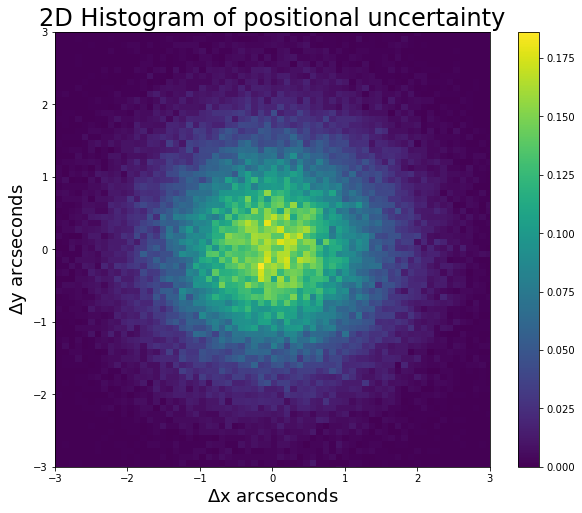

In [35]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)


1) 
The question in words is <br />
What is the angular distance from the origin to produce the significance of 5 $\sigma$ in movement at the background noise?

2. 
The question in math is <br />
In order to get the same outcome of the probability of the Guassian of 5 $\sigma$, then what value we should choose on the Rayleigh distribution, to take the integral over the ppf function from this value to the infinity. Also, since the sum is alwyas one, we can also consider the left probabilities be same for simplicity.

Text(0, 0.5, 'probability density')

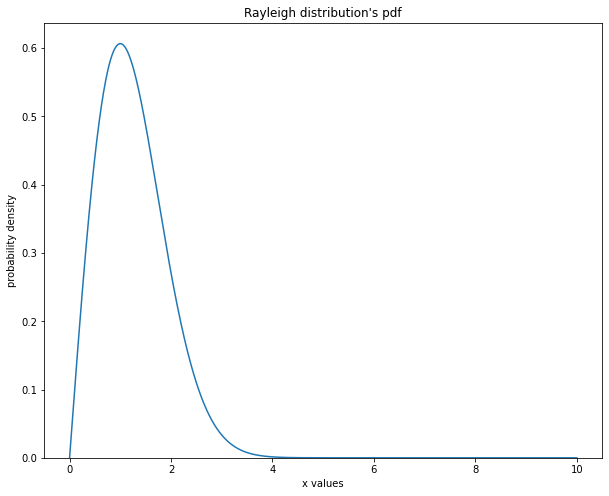

In [36]:
dist = stats.rayleigh(scale = 1) #create a new Rayleigh distribution
x = np.linspace (0,10,1000) #range of x values
pdf =  dist.pdf(x)
plt.plot(x, pdf)
plt.ylim(0)
plt.title("Rayleigh distribution's pdf")
plt.xlabel("x values")
plt.ylabel("probability density")


3) 

In [37]:
prob = stats.norm.cdf(5) #find the required probability
value = stats.rayleigh.ppf(prob)
print('the angular distance required for 5 sigma detection of motion from the origin is ' + str(value))

the angular distance required for 5 sigma detection of motion from the origin is 5.489079776034238


# problem3

 1)
Converted questionin into words:<br />
What is the significance of the moon shadow detection that will provide 6800 rays signal or more for 15 days?

2) 
tranlated into math:<br />
From the assumption, we learn if the average number per minute of cosmic ray is one. Then during eight hours, we are bound to see average 480 rays during eight hours. Then, we find this distribution is actually the Poisson distribution, and can consider the parameter as $\lambda = 480$. <br />
Then, we consider 15 days as measurement, it is exactly doing the convolution of multiple Poisson distribution. From previous practise, we know that the convolution of poisson distributions will still be the Poisson distribution. Here, now the mean is $15 * 480 = 7200$. Actually, we consider the Poisson distributions with parameter as $\lambda = 7200$. <br />
Meanwhile, here 6800 is smaller than the expected value (7200) It is the on the left of the expected value, which means the sigma that we calculated will be negative. What we always do, it is on the right and sigma should be positive. <br />
Last, for the probability part, we should take the left integral instead of the right integral.

Text(0, 0.5, 'probability')

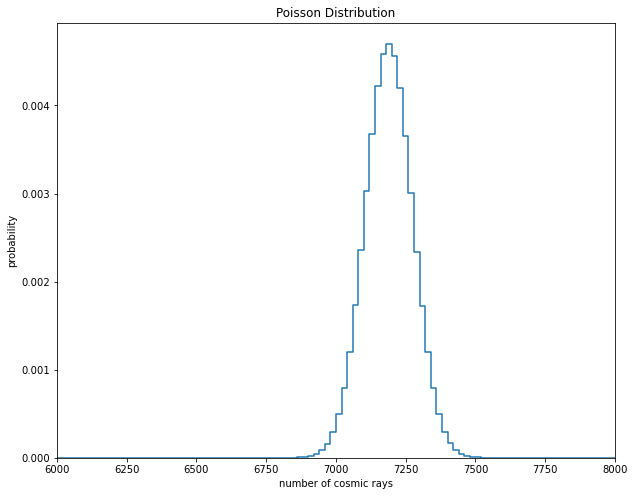

In [38]:
x2 = np.linspace(0, 10000, 501)
plt.step(x2, stats.poisson.pmf(x2, 7200))
plt.xlim(6000,8000)
plt.ylim(0)
plt.title('Poisson Distribution')
plt.xlabel('number of cosmic rays')
plt.ylabel('probability')


3. 
convert to sigma

In [39]:
probability = stats.poisson.cdf(6800, 7200)
sigma = stats.norm.ppf(probability)
sigma

-4.750747965777188

Here, we find the value of the sigma is -4.75. This absolute value of this sigma is smaller than five, then it cannot become a discovery.